## test_d22.ipynb
Test functions contained in d22a.py.

Note: these tests are neither rigorous unit tests, nor are they comprehensive. Rather, the tests focus on the behaviour of the functions before they are applied in analysis_d22a.ipynb.

Author: Benjamin S. Grandey, 2023.

In [1]:
import d22a
import datetime
import matplotlib.pyplot as plt

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Watermark, including versions of dependencies
print(d22a.get_watermark())

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

matplotlib : 3.7.1
numpy      : 1.25.0
pandas     : 2.0.3
scipy      : 1.11.1
statsmodels: 0.14.0
xarray     : 2023.6.0

conda environment: d22a-mcdc

Compiler    : Clang 15.0.7 
OS          : Darwin
Release     : 22.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



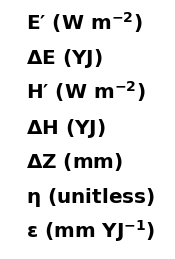

In [4]:
# Test rendering of variable symbols and units
fig, ax = plt.subplots(figsize=(2, 3))
ax.axis('off')
for v, var in enumerate(d22a.SYMBOLS_DICT.keys()):
    var_sym = d22a.SYMBOLS_DICT[var]
    units = d22a.UNITS_DICT[var]
    ax.text(0.1, 0.95-(0.15*v), f'{var_sym} ({units})', fontsize='x-large', fontweight='bold')

In [5]:
%%time
# Get calendar, number of days in year, and parent branch year for historical simulation of an ESM
d22a.get_calendar_days_branch(esm='UKESM1-0-LL_r1i1p1f2')

CPU times: user 15.9 ms, sys: 13.5 ms, total: 29.4 ms
Wall time: 65 ms


('360_day', 360, 2250)

In [6]:
%%time
# Get CMIP6 ESM data, including reading data and basic processing.
d22a.get_cmip6_df()

get_cmip6_df(ACCESS-CM2_r1i1p1f1, piControl): shifted start year from 950 to 1850
get_cmip6_df(ACCESS-ESM1-5_r1i1p1f1, piControl): shifted start year from 101 to 1790
get_cmip6_df(CanESM5_r1i1p1f1, piControl): shifted start year from 5201 to 1850
get_cmip6_df(EC-Earth3-Veg-LR_r1i1p1f1, piControl): shifted start year from 2300 to 1850
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): shifted start year from 1850 to 1790
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): gap after 2789; using period before gap; length 1800 yr -> 1000 yr
get_cmip6_df(MIROC6_r1i1p1f1, piControl): shifted start year from 3200 to 1850
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, piControl): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, historical): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1 ssp126): shifted yr-2015 zostoga from 2.0 to 69.4 mm
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, ssp126): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f

,ESM,Scenario,Year,Ep,E,Hp,H,Z,convert_Wm2yr_YJ
0,ACCESS-CM2_r1i1p1f1,piControl,1850,0.376755,-0.026890,0.126548,-0.001323,-1.459961,0.016098
1,ACCESS-CM2_r1i1p1f1,piControl,1851,0.491939,-0.018972,0.019186,-0.001014,-1.108704,0.016098
2,ACCESS-CM2_r1i1p1f1,piControl,1852,0.455935,-0.011632,0.134397,0.001149,-0.109741,0.016098
3,ACCESS-CM2_r1i1p1f1,piControl,1853,0.418888,-0.004889,0.087970,0.002565,0.059875,0.016098
4,ACCESS-CM2_r1i1p1f1,piControl,1854,0.382430,0.001267,0.185772,0.005556,0.322205,0.016098
...,...,...,...,...,...,...,...,...,...
29502,UKESM1-0-LL_r1i1p1f2,ssp585,2096,3.468888,3.291027,3.079318,2.017449,361.353424,0.015866
29503,UKESM1-0-LL_r1i1p1f2,ssp585,2097,3.429853,3.345446,2.697973,2.060256,367.789276,0.015866
29504,UKESM1-0-LL_r1i1p1f2,ssp585,2098,3.208143,3.396347,2.683542,2.102834,373.251892,0.015866
29505,UKESM1-0-LL_r1i1p1f2,ssp585,2099,3.837172,3.457228,3.448655,2.157551,380.574432,0.015866


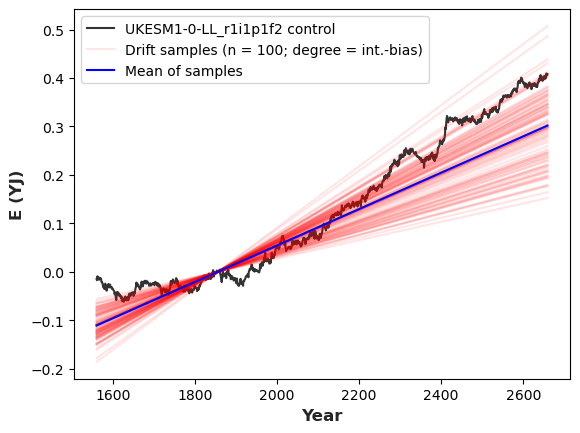

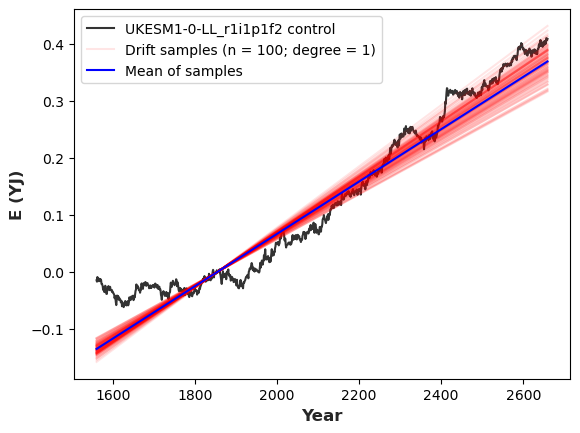

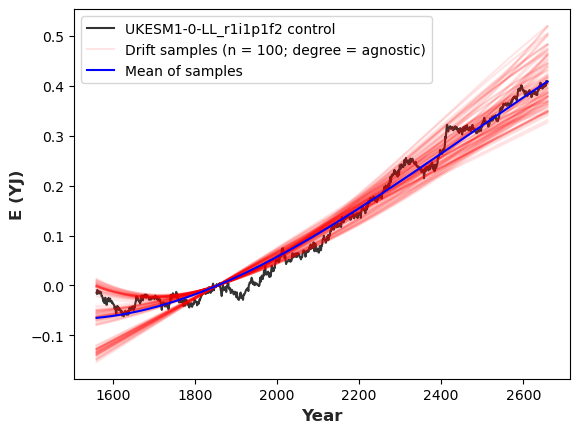

CPU times: user 649 ms, sys: 62.6 ms, total: 712 ms
Wall time: 716 ms


<xarray.DataArray (Draw: 100, Year: 1100)>
array([[-1.33478137e-01, -1.33024901e-01, -1.32571665e-01, ...,
         3.63722259e-01,  3.64175496e-01,  3.64628732e-01],
       [-1.24595352e-01, -1.24172278e-01, -1.23749203e-01, ...,
         3.39517045e-01,  3.39940119e-01,  3.40363194e-01],
       [-1.36739514e-01, -1.36275203e-01, -1.35810893e-01, ...,
         3.72609372e-01,  3.73073683e-01,  3.73537994e-01],
       ...,
       [-2.28873418e-03, -2.61515541e-03, -2.93895734e-03, ...,
         4.44208119e-01,  4.44645405e-01,  4.45081460e-01],
       [-9.40858031e-04, -1.28626770e-03, -1.62891041e-03, ...,
         4.02204440e-01,  4.02479825e-01,  4.02753571e-01],
       [ 1.04355781e-03,  6.87126246e-04,  3.33433948e-04, ...,
         5.03430531e-01,  5.04015145e-01,  5.04598733e-01]])
Coordinates:
  * Draw     (Draw) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101
  * Year     (Year) int64 1560 1561 1562 1563 1564 ... 2655 2656 2657 2658 2659

In [7]:
%%time
# Sample drift of a control simulation, using OLS with HAC. Returns samples as DataArray.
for degree in ['int.-bias', 'linear', 'agnostic']:
    drift_da = d22a.sample_drift(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, plot=True)
drift_da

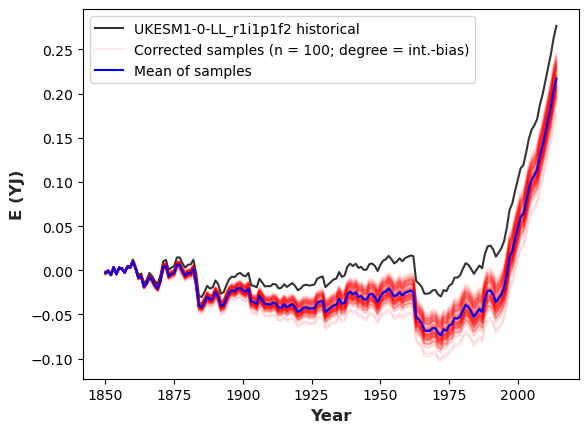

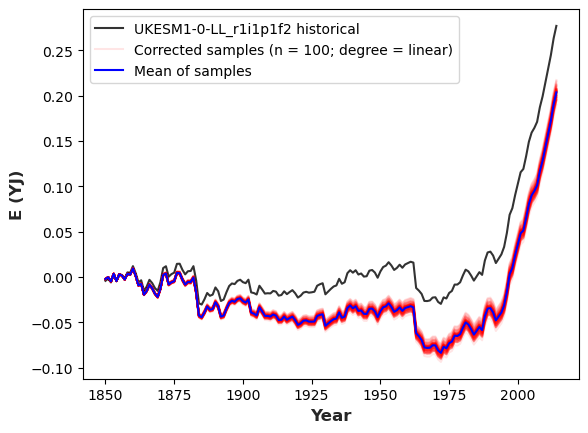

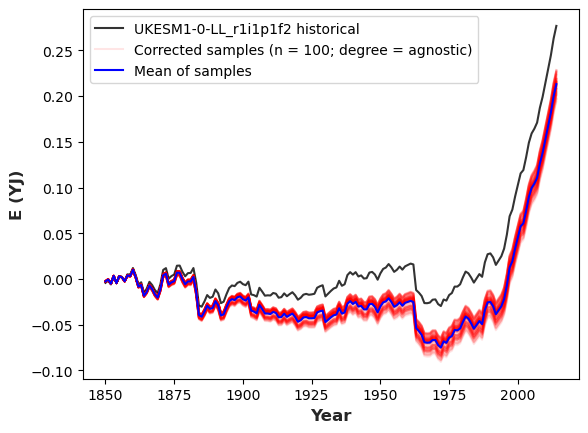

CPU times: user 505 ms, sys: 52.5 ms, total: 557 ms
Wall time: 558 ms


<xarray.DataArray (Year: 165, Draw: 100)>
array([[-2.14412176e-03, -2.27985193e-03, -2.09428748e-03, ...,
        -2.87701210e-03, -2.86541334e-03, -2.83945294e-03],
       [-2.37612658e-04, -3.43180569e-04, -1.98852663e-04, ...,
        -8.03383952e-04, -7.94363528e-04, -7.73792171e-04],
       [-4.80811306e-03, -4.88351872e-03, -4.78042735e-03, ...,
        -5.20836689e-03, -5.20192538e-03, -5.18688453e-03],
       ...,
       [ 1.73079074e-01,  1.77829630e-01,  1.71334874e-01, ...,
         1.80973946e-01,  1.80913108e-01,  1.77815682e-01],
       [ 1.91017253e-01,  1.95797971e-01,  1.89261979e-01, ...,
         1.98865552e-01,  1.98808656e-01,  1.95675320e-01],
       [ 2.04401324e-01,  2.09212205e-01,  2.02634976e-01, ...,
         2.12202017e-01,  2.12149146e-01,  2.08979662e-01]])
Coordinates:
  * Year     (Year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * Draw     (Draw) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101

In [8]:
%%time
# Apply MCDC to get drift corrected samples.
for degree in ['int.-bias', 'linear', 'agnostic']:
    corr_da = d22a.sample_corrected(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, scenario='historical', plot=True)
corr_da

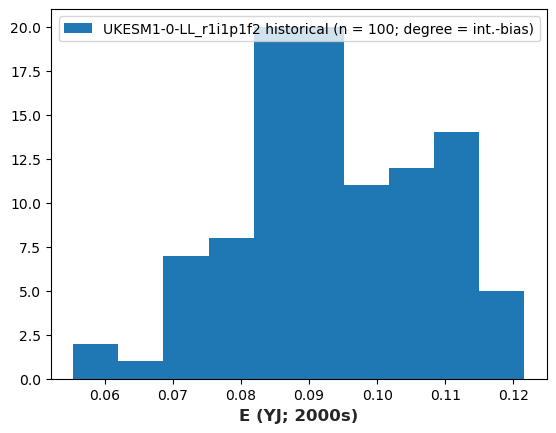

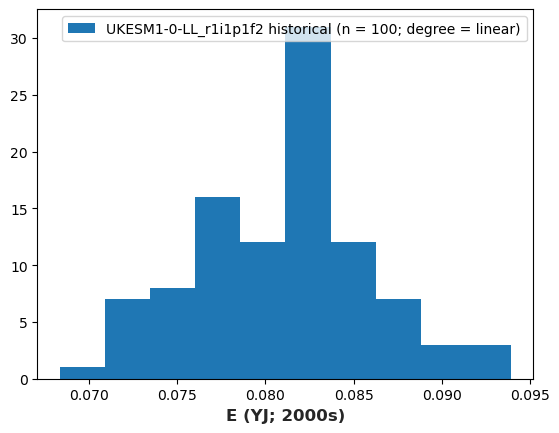

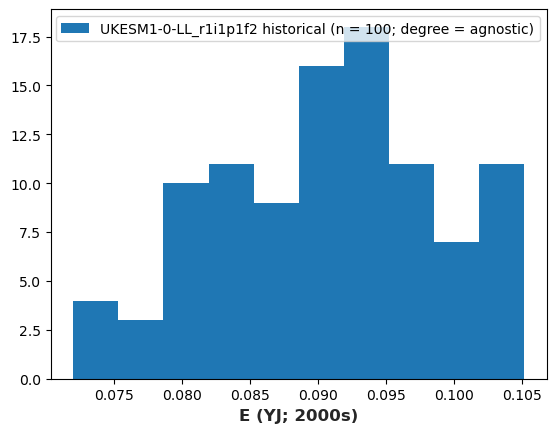

CPU times: user 182 ms, sys: 9.23 ms, total: 192 ms
Wall time: 192 ms


<xarray.DataArray (Draw: 100)>
array([0.08200694, 0.08653128, 0.0803458 , 0.08243036, 0.07495804,
       0.0882621 , 0.08318753, 0.0833447 , 0.08913913, 0.08245202,
       0.07963807, 0.08476428, 0.07379821, 0.07938298, 0.08142836,
       0.08146755, 0.07802722, 0.08505858, 0.07586379, 0.07202049,
       0.08492129, 0.07484879, 0.07933837, 0.08492058, 0.08492641,
       0.07962211, 0.07946906, 0.08531969, 0.08524621, 0.08584318,
       0.08115201, 0.07782831, 0.08171056, 0.10512739, 0.09589553,
       0.10322617, 0.10267465, 0.10441825, 0.10020492, 0.1050075 ,
       0.09160452, 0.09544071, 0.09608798, 0.09773874, 0.08986396,
       0.10347372, 0.09597338, 0.10011122, 0.09573301, 0.1022347 ,
       0.10430558, 0.08840898, 0.099424  , 0.10386538, 0.09654614,
       0.100379  , 0.10073336, 0.10280721, 0.09335572, 0.10282102,
       0.0934109 , 0.09238693, 0.09755865, 0.09920974, 0.09356779,
       0.10147372, 0.09222462, 0.08957407, 0.0967687 , 0.09488921,
       0.09081722, 0.0884477 , 0.09352618, 0.09022696, 0.09186389,
       0.09302211, 0.08806071, 0.09158107, 0.09315939, 0.09397782,
       0.09247451, 0.09063273, 0.09200777, 0.09526943, 0.09304196,
       0.09001945, 0.09571531, 0.09324826, 0.08987859, 0.08909434,
       0.08803689, 0.09348009, 0.09189023, 0.0931882 , 0.08932629,
       0.09084497, 0.09437657, 0.09021345, 0.09012591, 0.0872894 ])
Coordinates:
  * Draw     (Draw) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101

In [9]:
%%time
# Decadal-mean drift-corrected samples.
for degree in ['int.-bias', 'linear', 'agnostic']:
    decadal_da = d22a.sample_target_decade(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, scenario='historical',
                                           target_decade='2000s', plot=True)
decadal_da

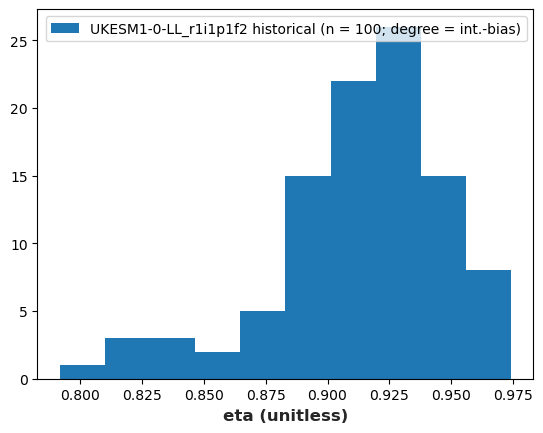

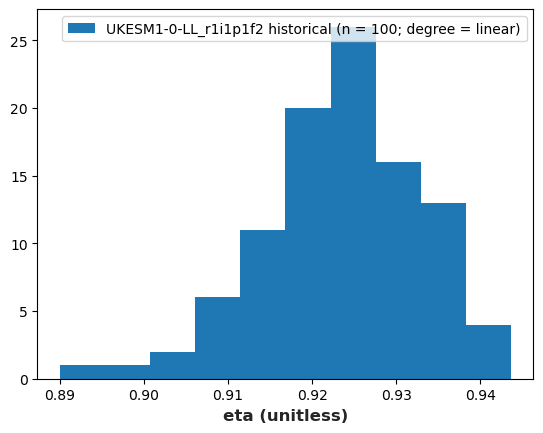

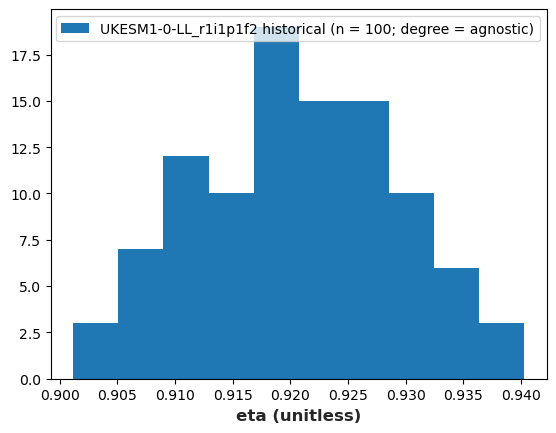

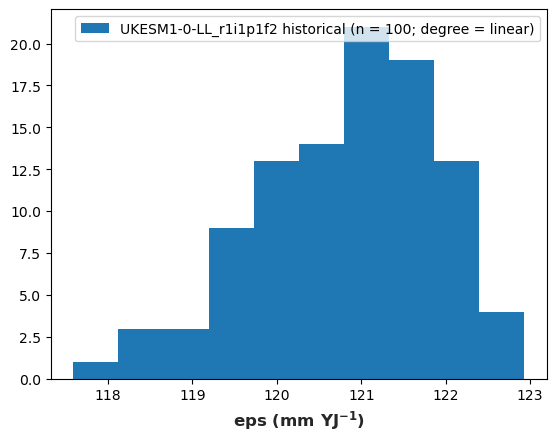

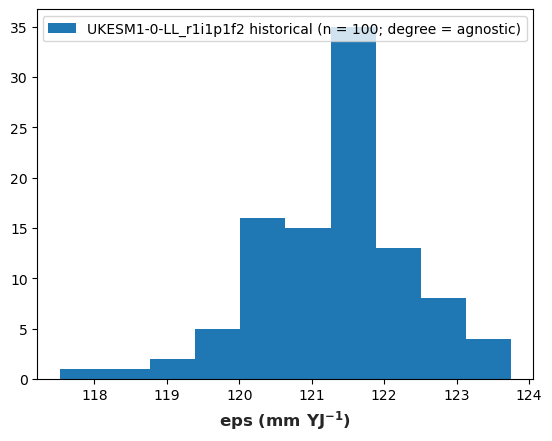

CPU times: user 456 ms, sys: 15.5 ms, total: 472 ms
Wall time: 472 ms


<xarray.DataArray (Draw: 100)>
array([121.28699227, 120.56077566, 121.58614955, 121.74178175,
       122.22796657, 120.46552524, 120.38046189, 121.63745621,
       119.75892058, 122.20623838, 121.4286206 , 122.07815879,
       121.54854794, 122.6612245 , 120.55227468, 121.17029906,
       120.40391655, 121.42399552, 120.47769604, 120.75897379,
       121.44833963, 121.61655367, 121.47606644, 121.80150969,
       121.39772385, 121.28171039, 122.30190878, 121.36314046,
       121.35560819, 120.21566972, 121.89688097, 121.12020948,
       118.42672247, 120.75525845, 121.14628623, 120.73592818,
       121.48924838, 122.57934536, 123.75059541, 119.09778906,
       120.77900458, 121.00562171, 120.35272322, 121.05633326,
       122.42585746, 121.78040558, 121.98396624, 122.70107828,
       121.37132609, 117.5251309 , 121.49871667, 120.01650578,
       119.82911952, 123.58132969, 121.81927186, 120.17057928,
       122.41356341, 121.2971883 , 123.67922884, 119.58940948,
       120.91290745, 121.35952817, 123.44654774, 120.89505273,
       122.60217595, 122.80265756, 121.3245547 , 120.56180985,
       121.57101722, 119.96645746, 121.33014855, 120.86995879,
       122.11957993, 119.85167917, 122.01900836, 121.40520268,
       121.79276945, 122.14937494, 120.48925969, 121.79966869,
       123.10992403, 121.09575259, 121.33970278, 120.04918049,
       122.39919131, 119.01405668, 122.85914328, 121.28033325,
       121.77087748, 120.05601918, 120.61398263, 121.17165302,
       122.11523237, 121.36903063, 120.88010355, 121.63070154,
       122.64452634, 121.38162046, 121.57988271, 120.20403396])
Coordinates:
  * Draw     (Draw) int64 0 1 2 3 4 5 6 7 8 9 ... 93 94 95 96 97 98 99 100 101

In [10]:
%%time
# Samples of eta or epsilon coefficients
for degree in ['int.-bias', 'linear', 'agnostic']:
    coeff_da = d22a.sample_eta_eps(esm='UKESM1-0-LL_r1i1p1f2', eta_or_eps='eta', degree=degree, scenario='historical', plot=True)
for degree in ['linear', 'agnostic']:
    coeff_da = d22a.sample_eta_eps(esm='UKESM1-0-LL_r1i1p1f2', eta_or_eps='eps', degree=degree, scenario='historical', plot=True)
coeff_da

In [11]:
%%time
# Calculate drift uncertainty using 2nd-98th percentiles of drift-corrected samples.
for degree in ('int.-bias', 'linear', 'agnostic'):
    uncertainty = d22a.calc_drift_uncertainty(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, scenario='historical',
                                              target_decade='2000s')
    print(uncertainty)

0.04896604679085792
0.01950024150454216
0.029602247867647966
CPU times: user 2.31 ms, sys: 971 µs, total: 3.28 ms
Wall time: 2.86 ms


In [12]:
%%time
# Calculate scenario uncertainty based on the inter-scenario range across SSPs.
uncertainty = d22a.calc_scenario_uncertainty(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, target_decade='2050s')
print(uncertainty)

0.25327078104019174
CPU times: user 7.47 ms, sys: 1.23 ms, total: 8.71 ms
Wall time: 7.83 ms


CPU times: user 11.1 ms, sys: 1.5 ms, total: 12.6 ms
Wall time: 11.4 ms


<Axes: xlabel='Year', ylabel='$E \\prime$ (W m$^{-2}$)'>

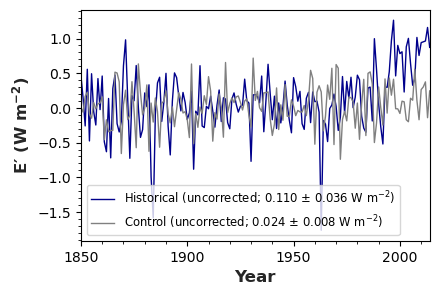

In [13]:
%%time
# Plot uncorrected time series for variable and scenario(s)
d22a.plot_uncorrected_timeseries(esm='UKESM1-0-LL_r1i1p1f2', variable='Ep', scenarios=('piControl', 'historical'),
                                 title=None, legend=True, label_mean=True, ax=None)

CPU times: user 92.9 ms, sys: 3.46 ms, total: 96.3 ms
Wall time: 95.3 ms


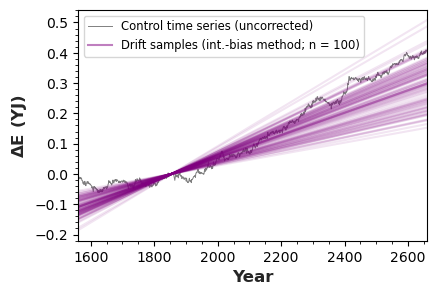

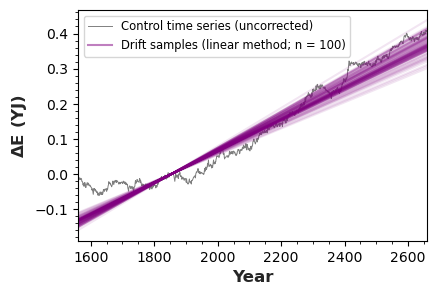

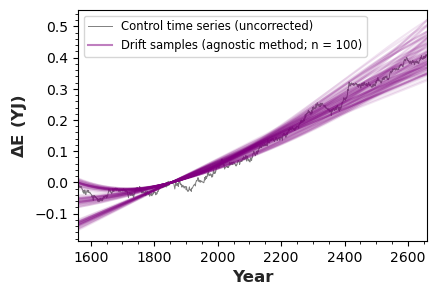

In [14]:
%%time
# Plot uncorrected control time series with drift samples.
for degree in ['int.-bias', 'linear', 'agnostic']:
    d22a.plot_control_with_drift(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, title=None, legend=True, ax=None)

CPU times: user 155 ms, sys: 3.48 ms, total: 158 ms
Wall time: 157 ms


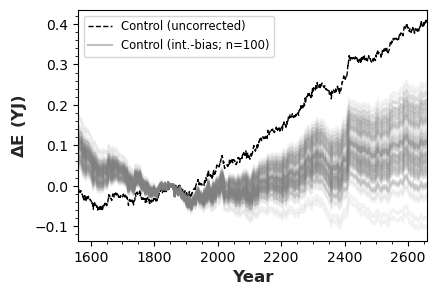

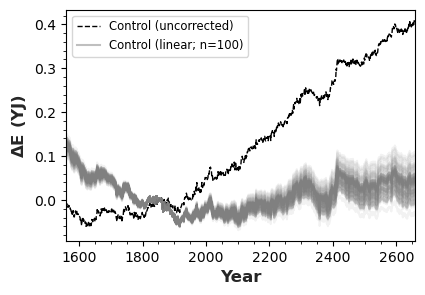

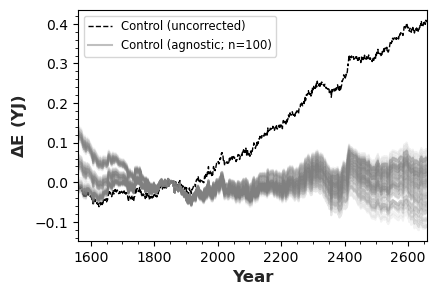

In [15]:
%%time
# Plot drift corrected time series for variable and scenario.
for degree in ['int.-bias', 'linear', 'agnostic']:
    d22a.plot_corrected_timeseries(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree,
                                   scenarios=('piControl',),
                                   plot_uncorrected=True, title=None, legend=True, ax=None)

CPU times: user 166 ms, sys: 4.25 ms, total: 171 ms
Wall time: 169 ms


<Axes: xlabel='$\\Delta E$ (YJ)', ylabel='$\\Delta H$ (YJ)'>

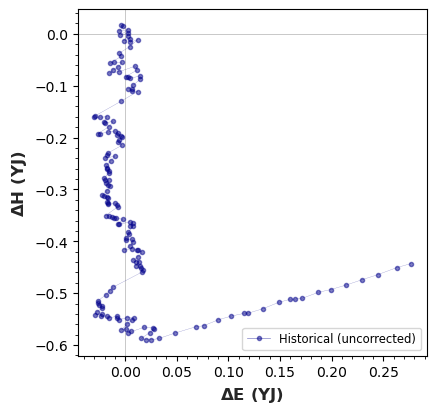

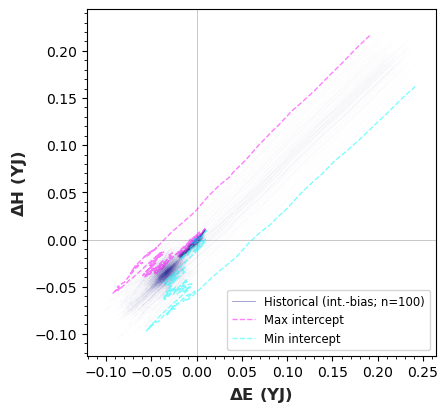

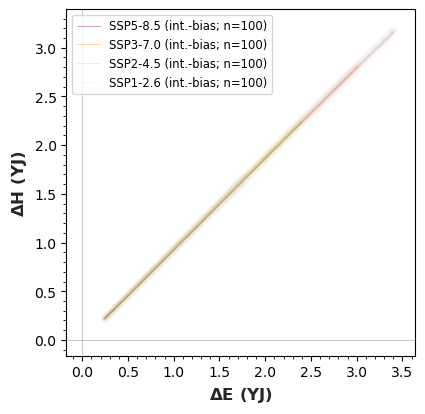

In [16]:
%%time
# Scatter (uncorrected) and/or line (corrected) plot of y_var vs x_var.
d22a.scatter_line_rel(esm='UKESM1-0-LL_r1i1p1f2', x_var='E', y_var='H', scenarios=('historical',),
                      plot_uncorrected=True, degree=None, plot_largest_intercept=False,
                      title=None, legend=True, ax=None)
d22a.scatter_line_rel(esm='UKESM1-0-LL_r1i1p1f2', x_var='E', y_var='H', scenarios=('historical',),
                      plot_uncorrected=False, degree='int.-bias', plot_largest_intercept=True,
                      title=None, legend=True, ax=None)
d22a.scatter_line_rel(esm='UKESM1-0-LL_r1i1p1f2', x_var='E', y_var='H', scenarios=True,
                      plot_uncorrected=False, degree='int.-bias', plot_largest_intercept=False,
                      title=None, legend=True, ax=None)

CPU times: user 224 ms, sys: 3.89 ms, total: 228 ms
Wall time: 228 ms


<Axes: xlabel='$\\eta$ (unitless)', ylabel='Count'>

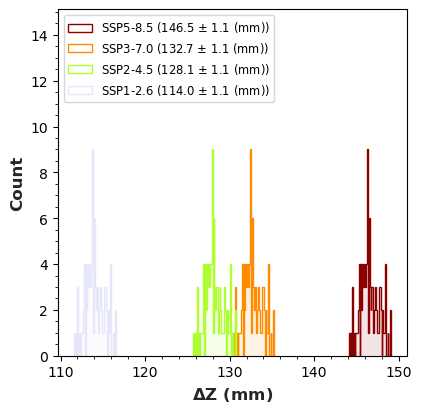

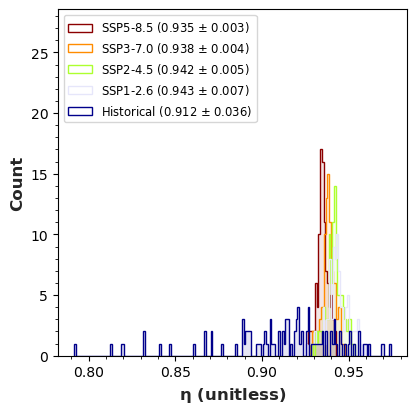

In [17]:
%%time
# Plot histogram of (i) E/H/Z for a target decade or (ii) eta/eps coefficient
d22a.histogram_of_variable(esm='UKESM1-0-LL_r1i1p1f2', variable='Z', degree='agnostic', scenarios=True,
                           target_decade='2050s')
d22a.histogram_of_variable(esm='UKESM1-0-LL_r1i1p1f2', variable='eta', degree='int.-bias', scenarios=True,
                           target_decade=None)

CPU times: user 209 ms, sys: 4.22 ms, total: 214 ms
Wall time: 212 ms


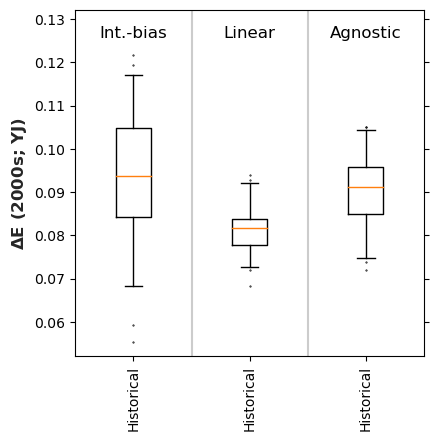

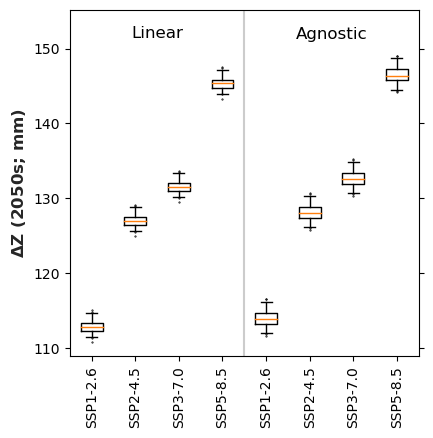

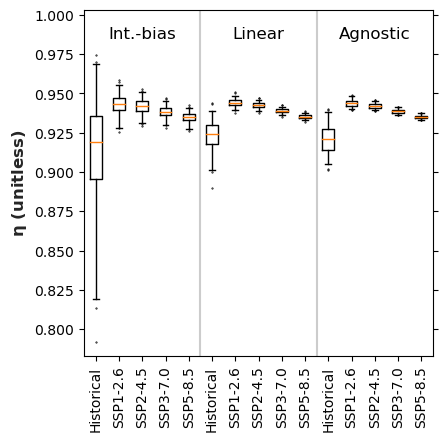

In [18]:
%%time
# Plot box and whisker plots of (i) E/H/Z for a target decade or (ii) eta/eps coefficient.
ax = d22a.boxplot_of_variable(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degrees=True, scenarios=True, target_decade='2000s')
ax = d22a.boxplot_of_variable(esm='UKESM1-0-LL_r1i1p1f2', variable='Z', degrees=True, scenarios=True, target_decade='2050s')
ax = d22a.boxplot_of_variable(esm='UKESM1-0-LL_r1i1p1f2', variable='eta', degrees=True, scenarios=True, target_decade=None)

CPU times: user 70.1 ms, sys: 4.75 ms, total: 74.9 ms
Wall time: 72.3 ms


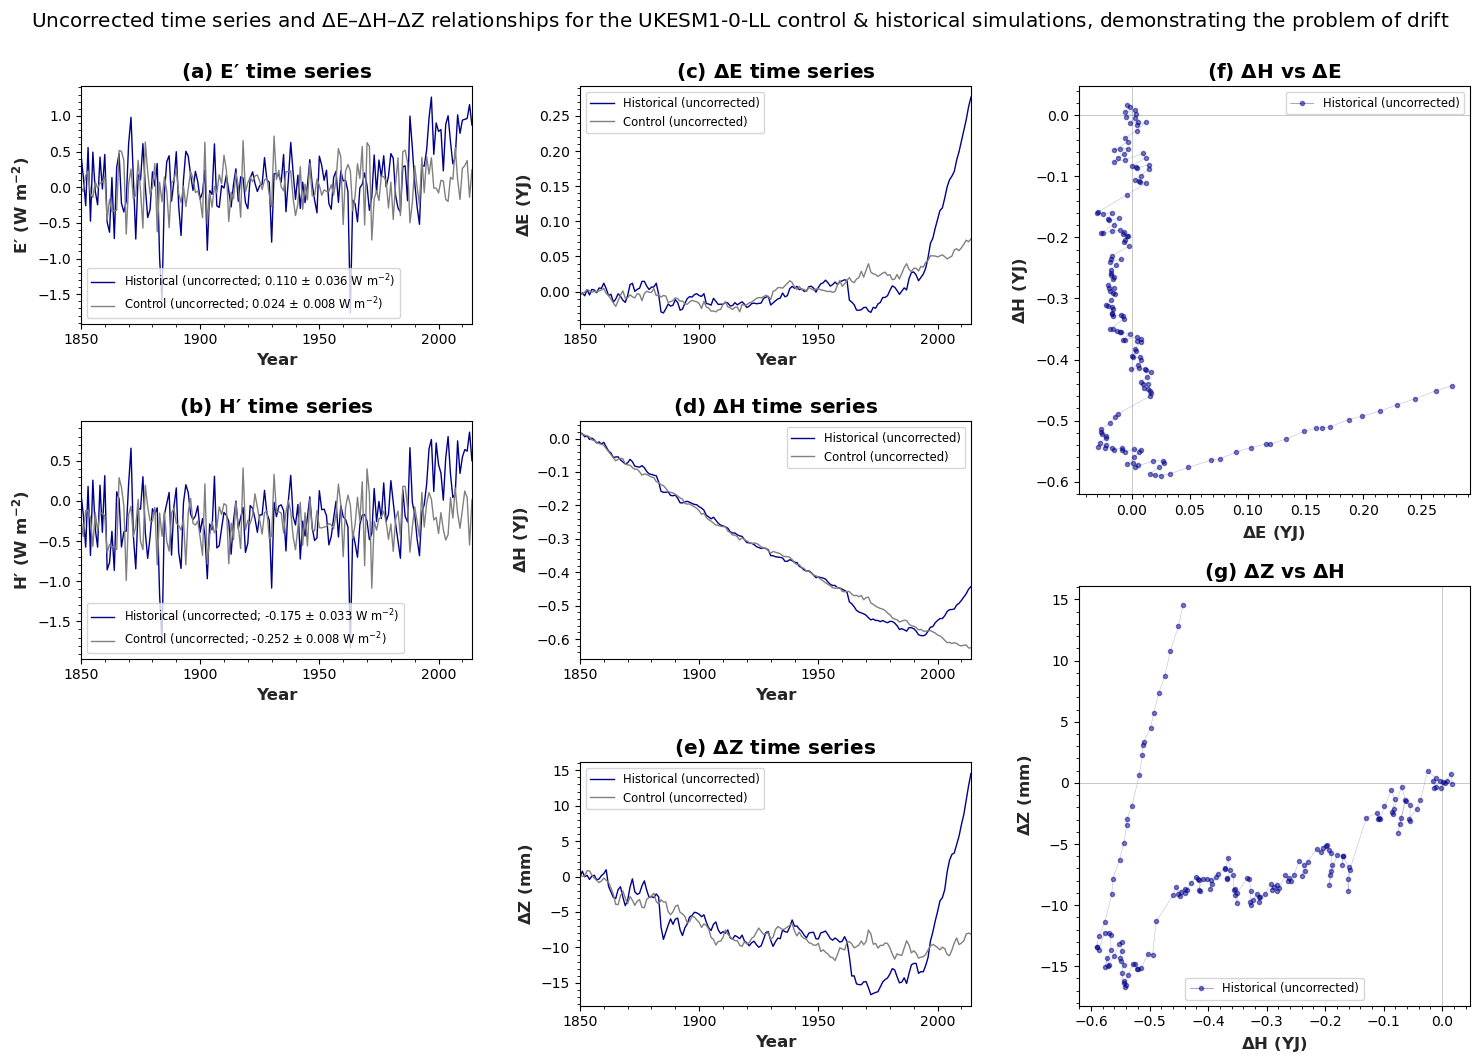

In [19]:
%%time
# Demonstrate problem of drift by showing uncorrected time series and relationships.
fig = d22a.composite_problem_of_drift(esm='UKESM1-0-LL_r1i1p1f2')

CPU times: user 255 ms, sys: 7.61 ms, total: 262 ms
Wall time: 260 ms


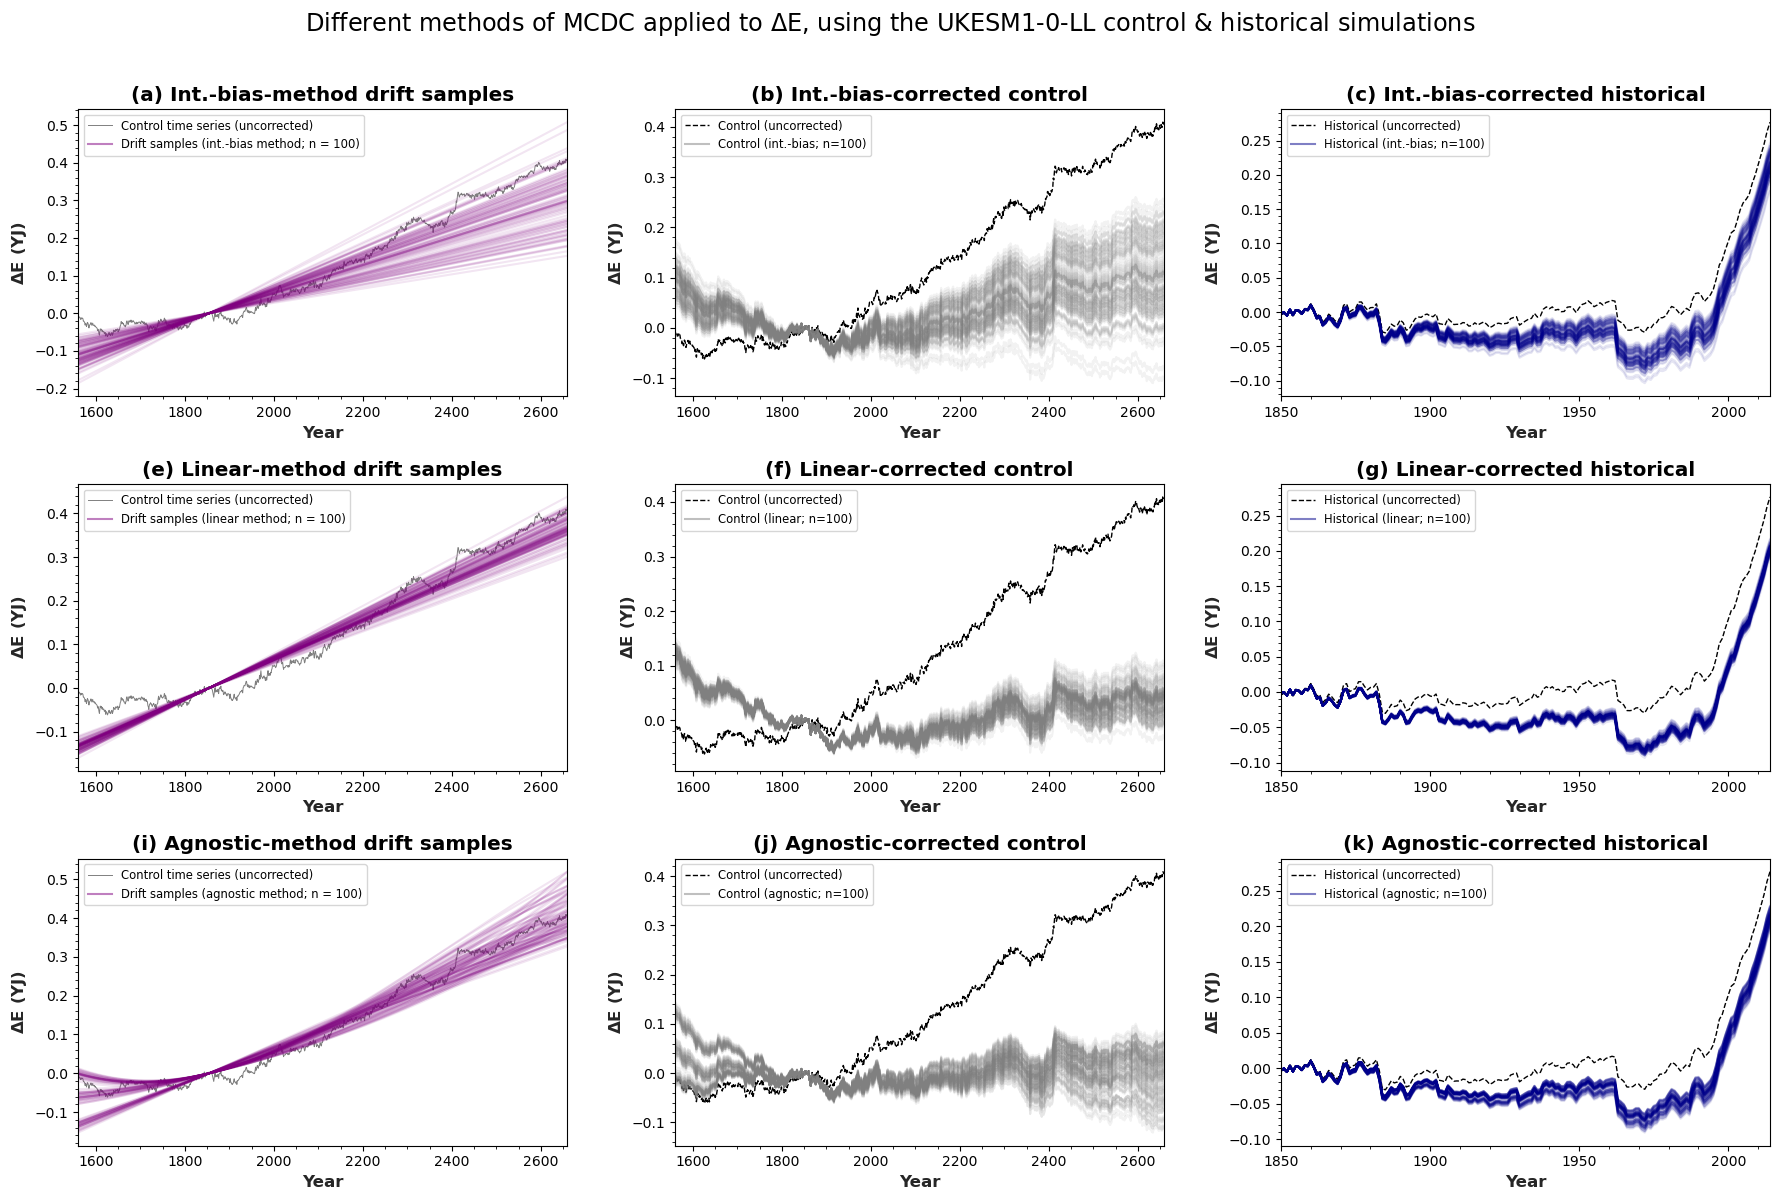

In [20]:
%%time
# Compare int.-bias, linear, and agnostic methods (ie degrees) of MCDC by plotting time series
fig = d22a.composite_compare_methods_timeseries(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degrees=True)

CPU times: user 118 ms, sys: 5.45 ms, total: 123 ms
Wall time: 121 ms


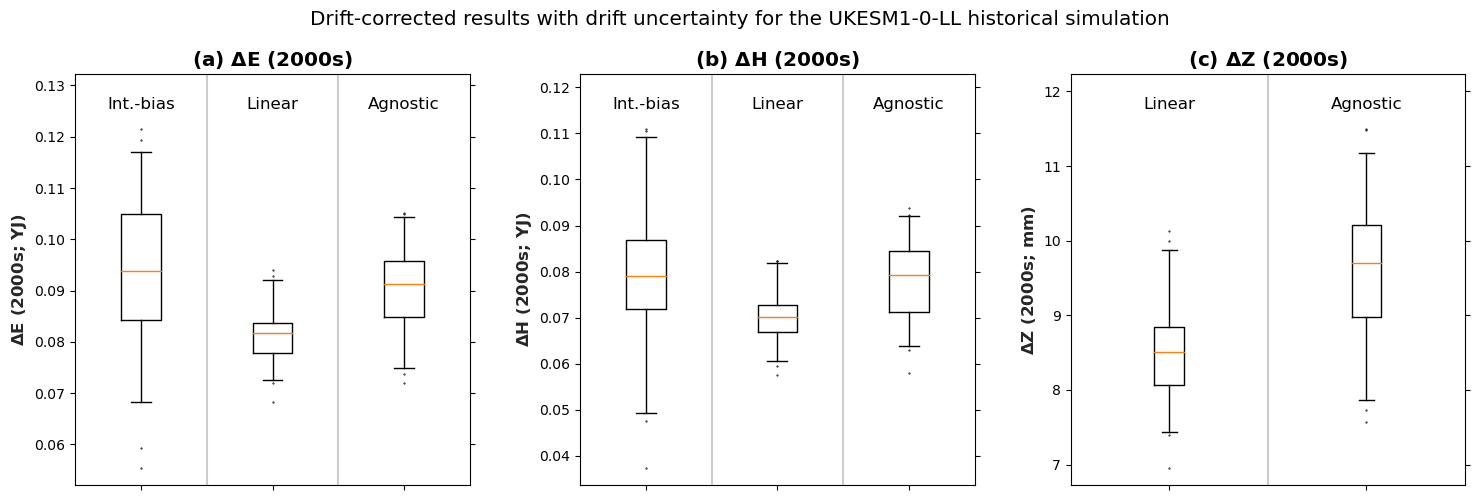

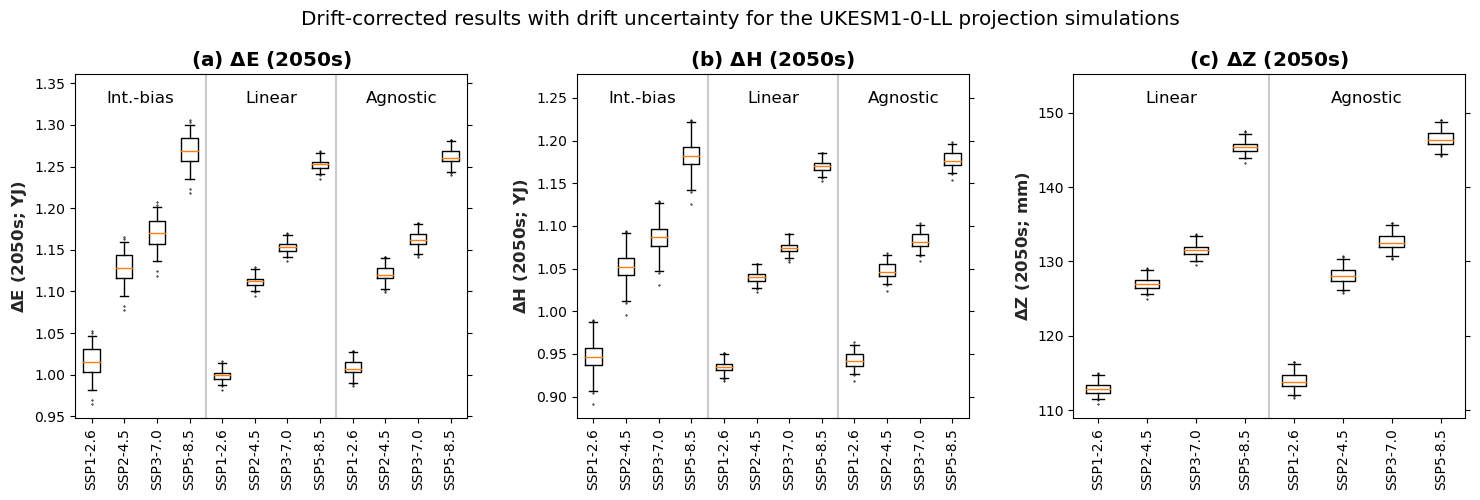

In [21]:
%%time
# Produce boxplots of drift-corrected results for multiple variables from one ESM.
fig = d22a.composite_boxplots(esm='UKESM1-0-LL_r1i1p1f2', variables=('E', 'H', 'Z'), target_decade='2000s', degrees=True, scenarios=True)
fig = d22a.composite_boxplots(esm='UKESM1-0-LL_r1i1p1f2', variables=('E', 'H', 'Z'), target_decade='2050s', degrees=True, scenarios=True)

CPU times: user 5.05 s, sys: 71.9 ms, total: 5.12 s
Wall time: 5.12 s


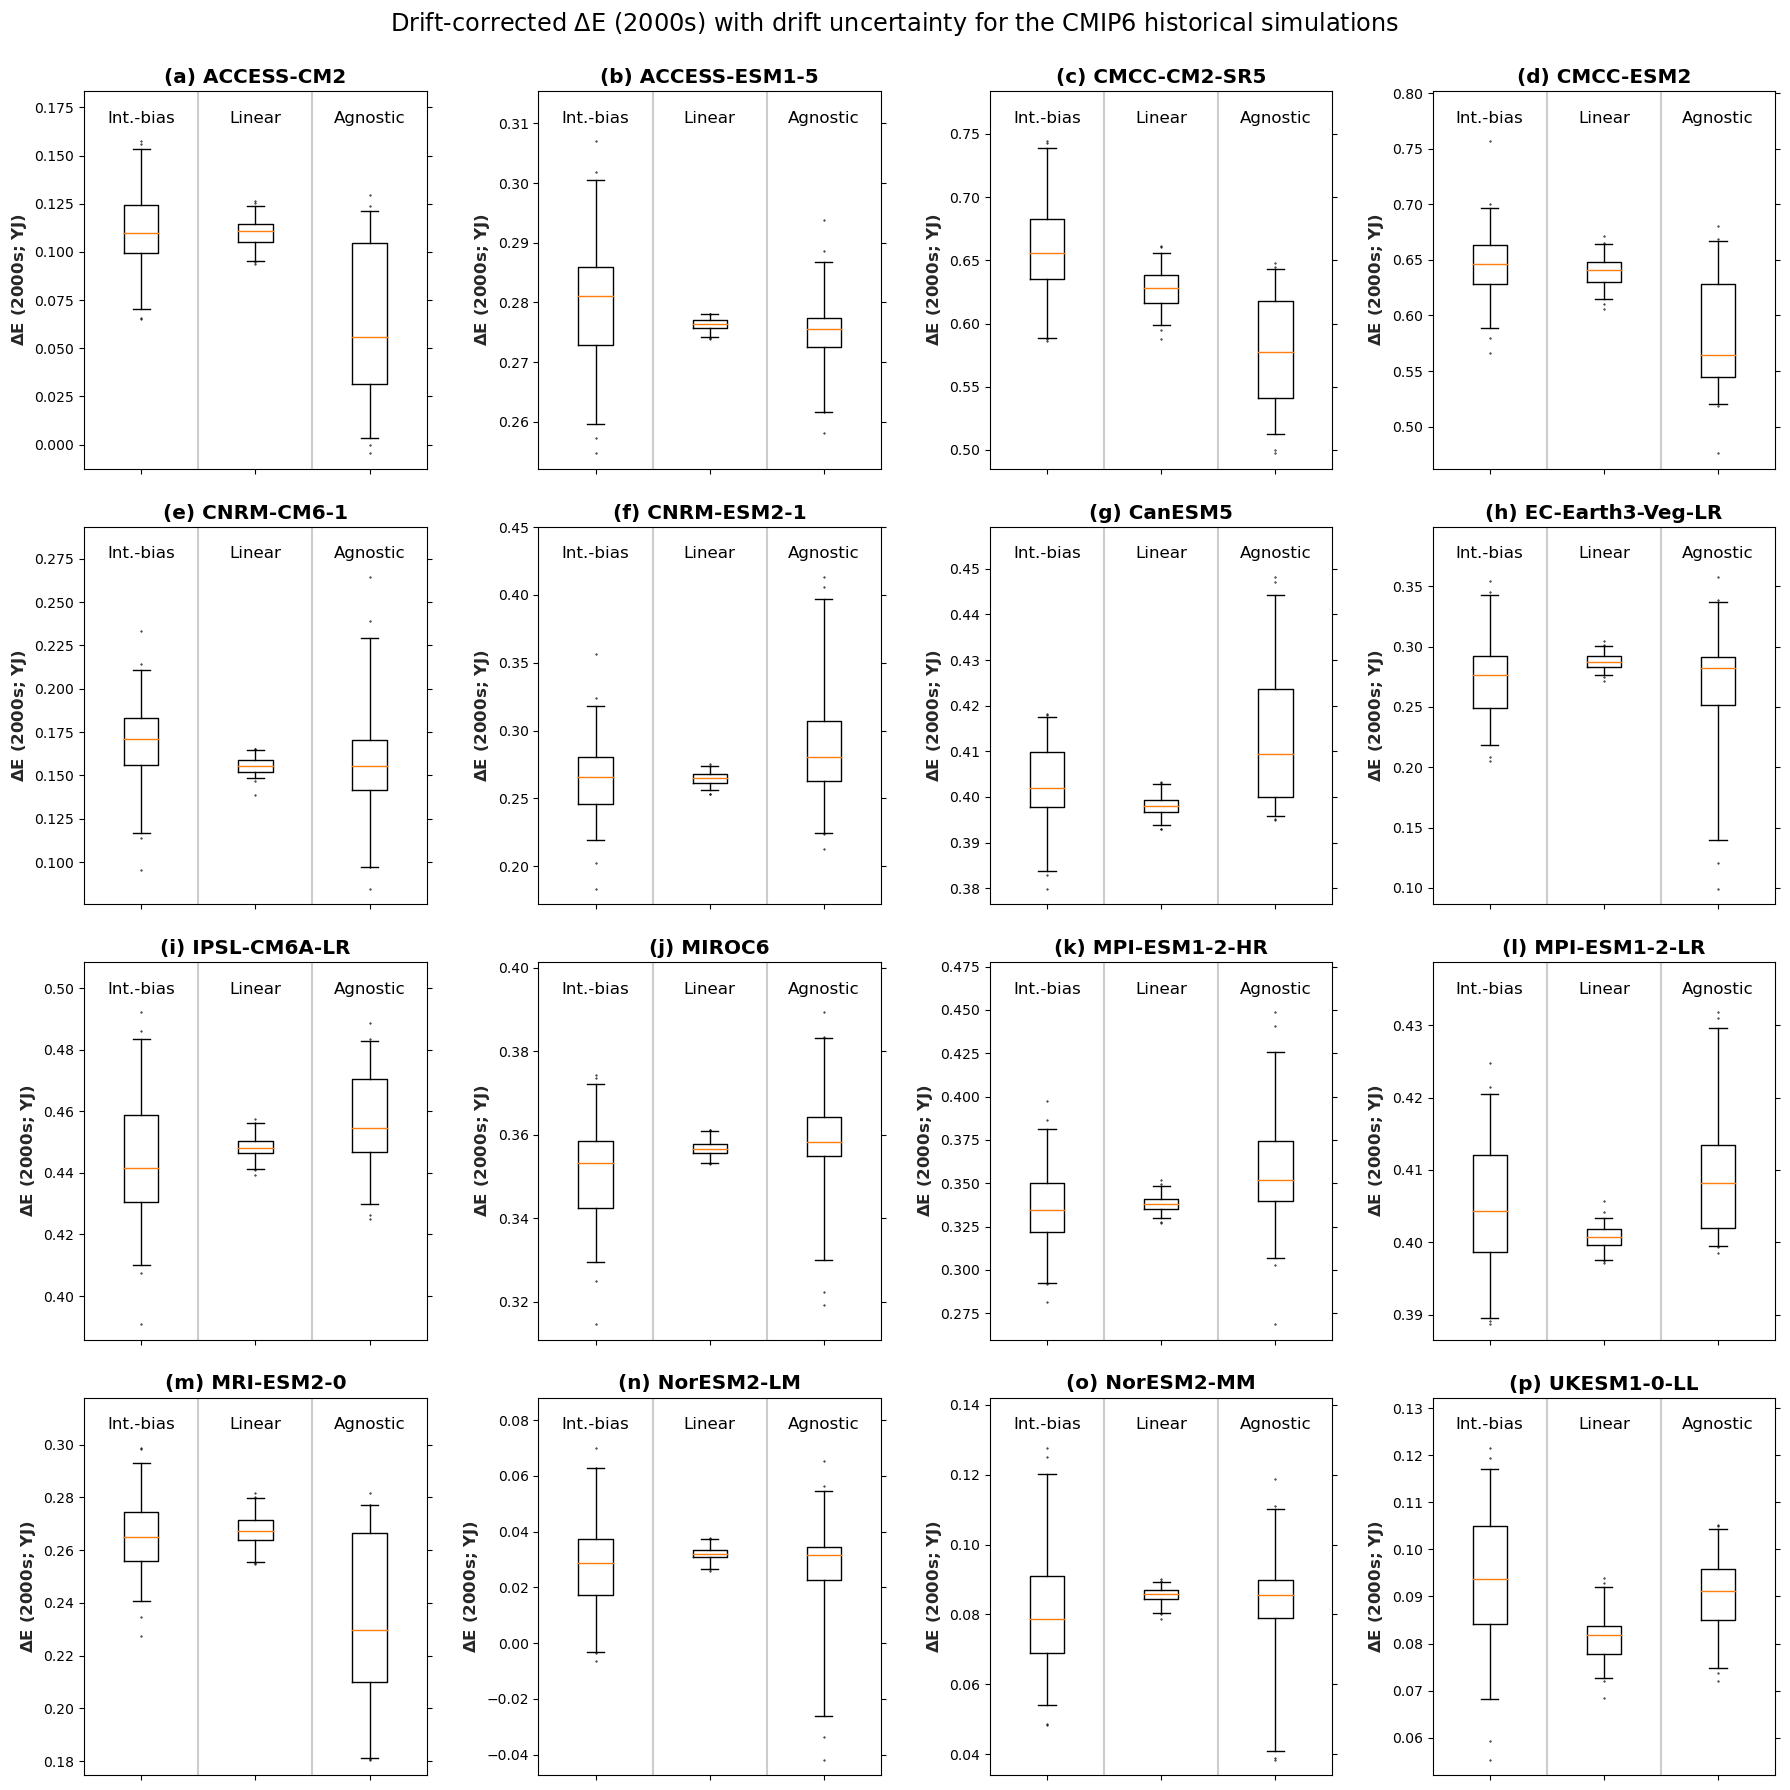

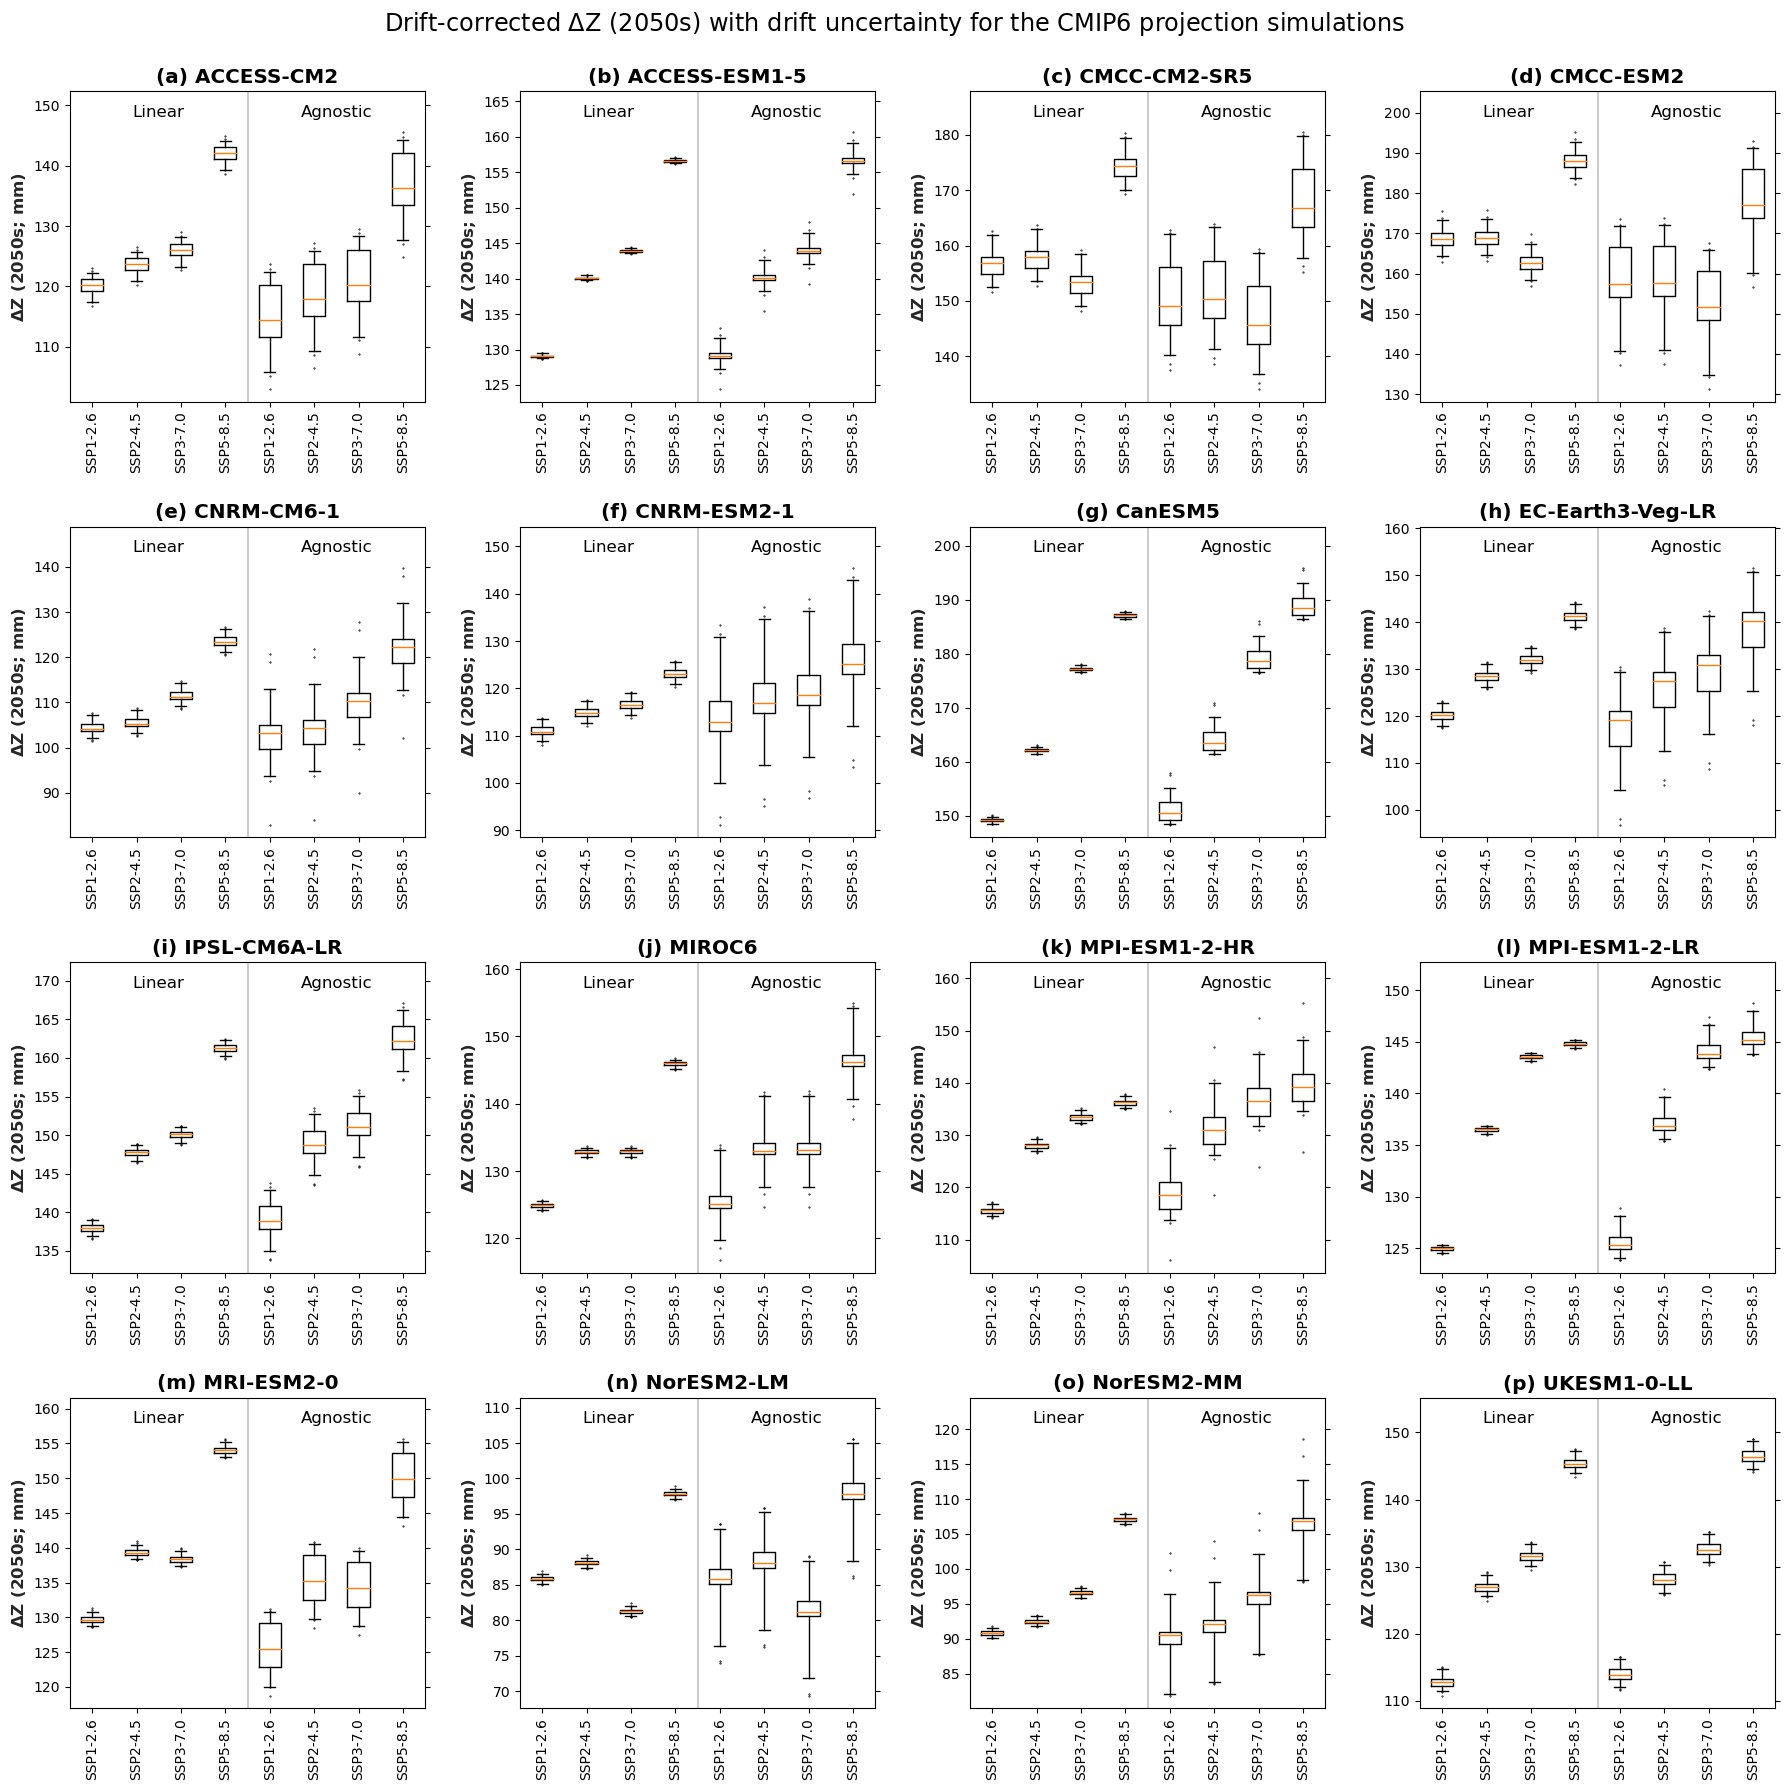

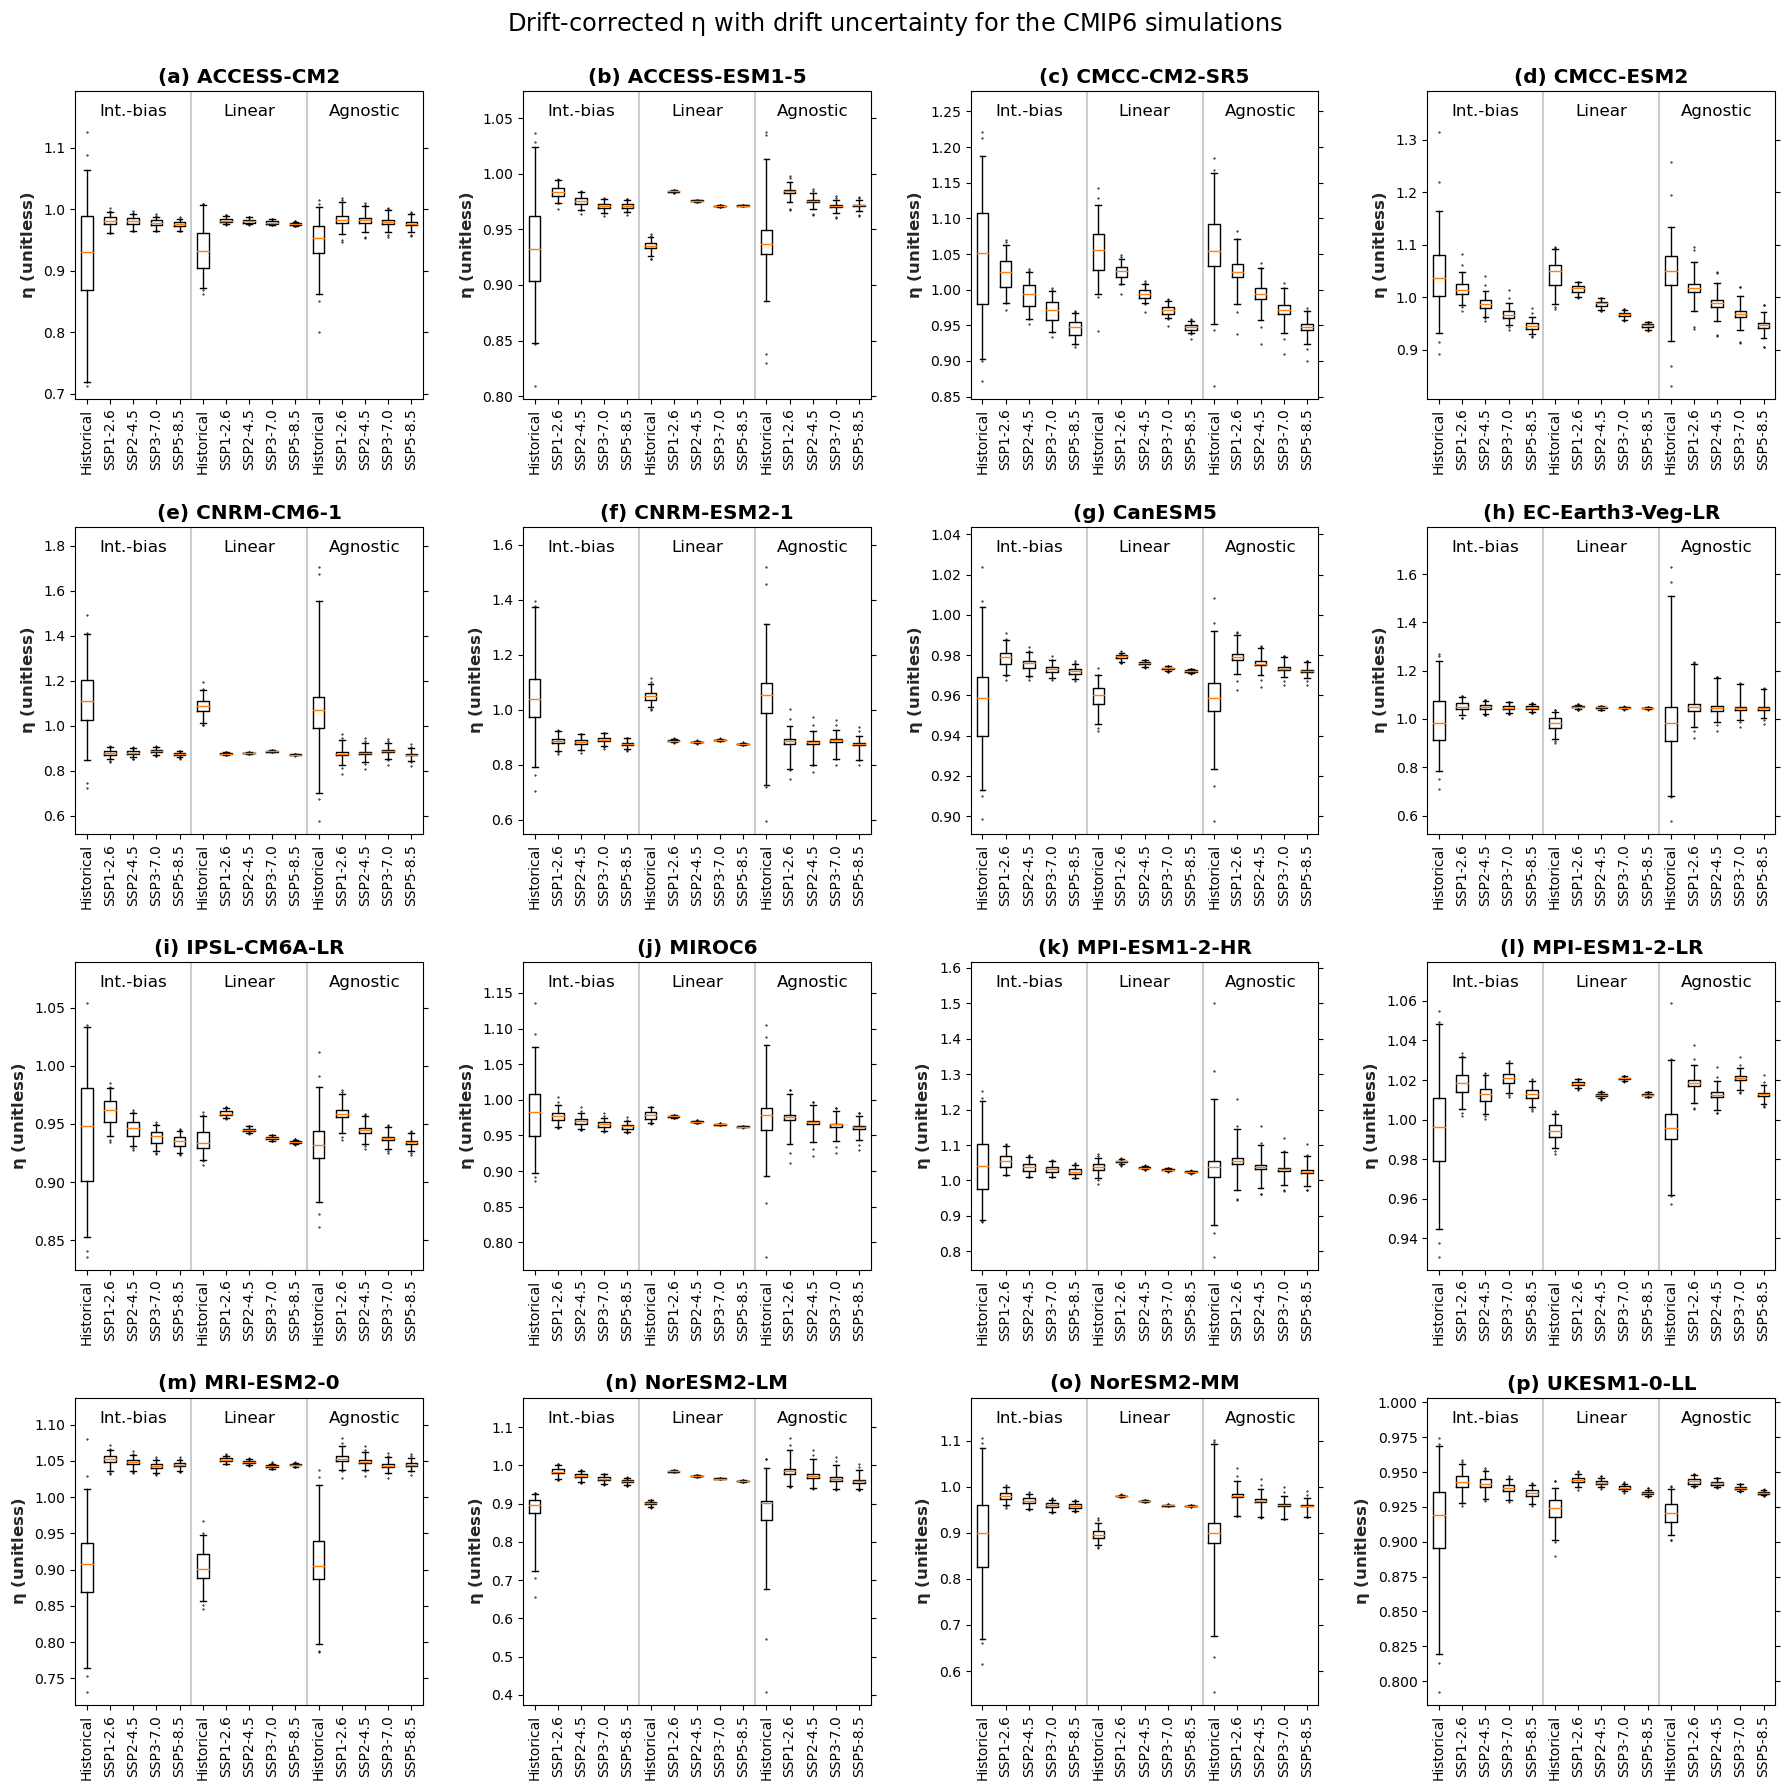

In [22]:
%%time
# Fig showing boxplots of drift-corrected results for the CMIP6 ensemble
_ = d22a.ensemble_boxplots(esms=True, variable='E', target_decade='2000s', degrees=True, scenarios=True)
_ = d22a.ensemble_boxplots(esms=True, variable='Z', target_decade='2050s', degrees=True, scenarios=True)
_ = d22a.ensemble_boxplots(esms=True, variable='eta', target_decade=None, degrees=True, scenarios=True)

CPU times: user 484 ms, sys: 15 ms, total: 499 ms
Wall time: 491 ms


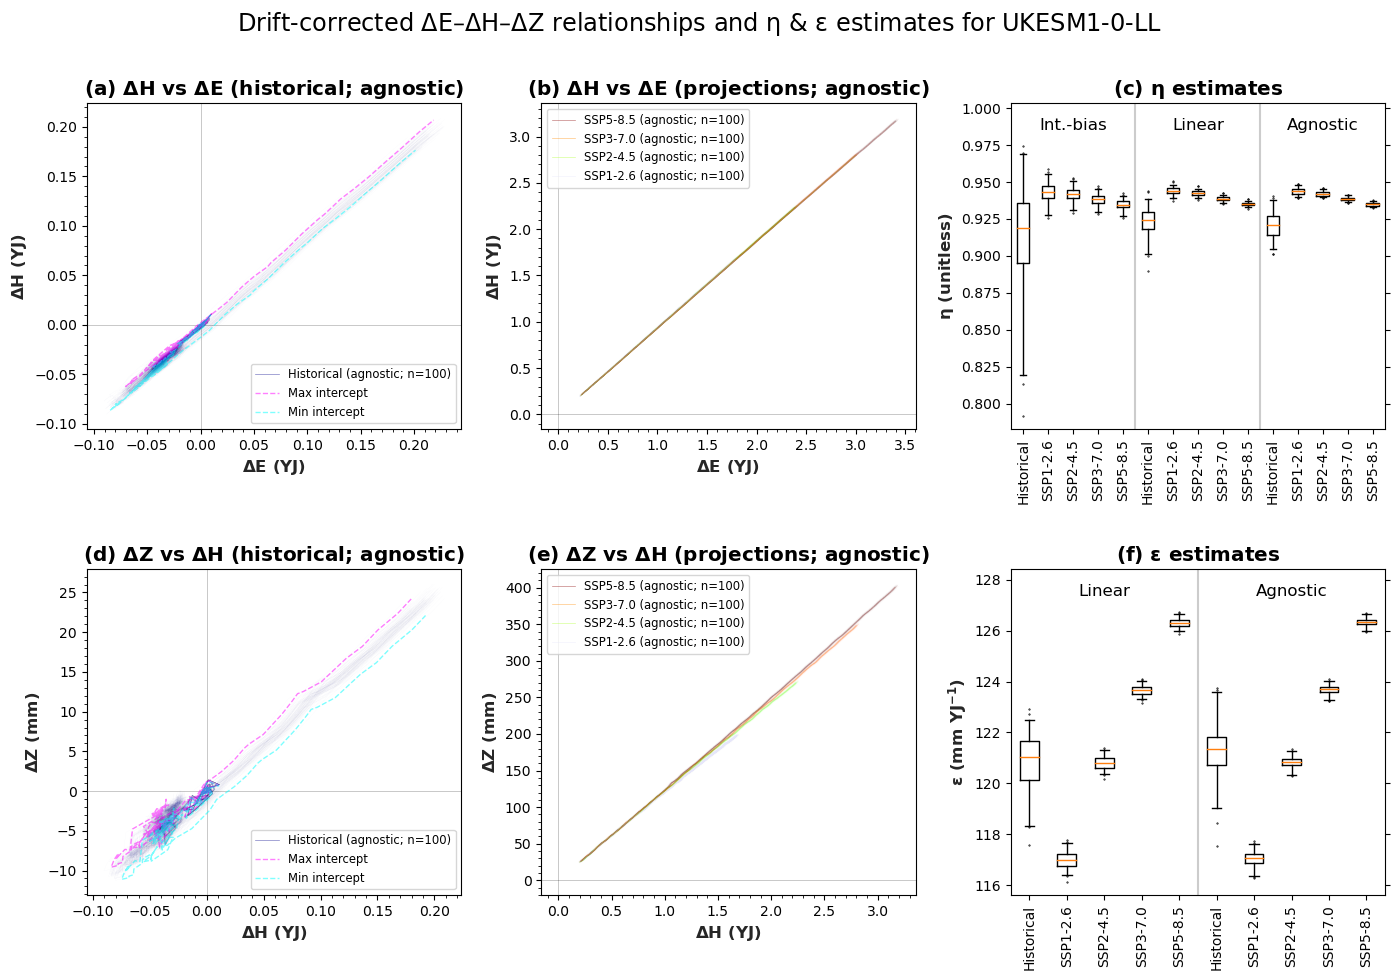

In [23]:
%%time
# Fig showing E-H-Z relationships and eta & eps boxplots for one ESM
_ = d22a.composite_rel_eta_eps_demo(esm='UKESM1-0-LL_r1i1p1f2', degree='agnostic')

In [24]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2023-07-13 11:48:11
End:       2023-07-13 11:48:36
Wall time: 24 s
